# Analisi dei siti dei Comuni italiani con Lighthouse

È stato fatto girare [Lighthouse](https://github.com/GoogleChrome/lighthouse) su tutti i siti dei Comuni italiani, usando gli URL "Sito istituzionale" prelevato da [IndicePA](https://www.indicepa.gov.it).

Il codice sorgente e i risultati si trovano qui https://github.com/mfortini/carbonEnti

In [35]:
import pandas as pd
import seaborn as sns
import geopandas as gpd

sns.set_theme()


In [3]:
enti = pd.read_csv("enti.csv")
d = pd.read_csv("entiRes.csv").merge(enti,on="Codice_IPA")

d1 = d[d["lighthouseScore"] > 0][["Codice_IPA","Denominazione_ente","url","lighthouseScore","firstMeaningfulPaint","totalByteWeight","bootstrap","bootstrapItalia"]]

In quanti enti è fallito Lighthouse?

In [4]:
d[d["lighthouseScore"]==0]["Codice_IPA"].count()

2455

Quanti hanno risposto in HTTPS e quanti in HTTP? (True: HTTPS, False: HTTP)

In [5]:
d1["url"].str.match("https://").value_counts()

True     5232
False      67
Name: url, dtype: int64

## Boxplot dei punteggi di Lighthouse

Si può vedere la distribuzione del punteggio sintetico di Lighthouse (da 0 a 100).

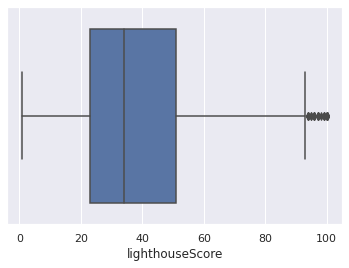

In [6]:
sns.boxplot(data=d1,x='lighthouseScore');

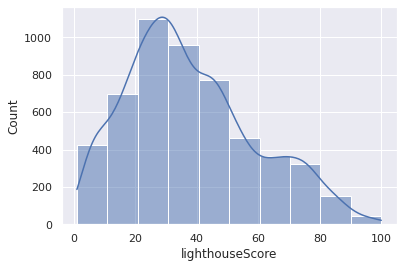

In [7]:
sns.histplot(data=d1,x="lighthouseScore",bins=10,kde=True);

## Analisi del tempo necessario per avere un contenuto "significativo"

I tempi indicati sono in **millisecondi**

In [8]:
d1["firstMeaningfulPaint"].describe()

count     5299.000000
mean      6021.811678
std       3712.426214
min        808.182000
25%       3682.775000
50%       5036.432500
75%       6510.941500
max      38165.865000
Name: firstMeaningfulPaint, dtype: float64

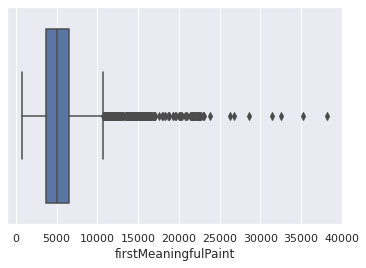

In [9]:
sns.boxplot(data=d1,x="firstMeaningfulPaint");

Ci limitiamo ai valori minori di 18000 per avere una visibilità migliore della distribuzione.

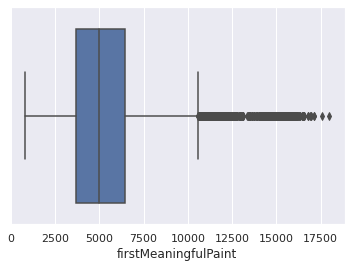

In [10]:
sns.boxplot(data=d1[d1["firstMeaningfulPaint"]<18000],x="firstMeaningfulPaint");

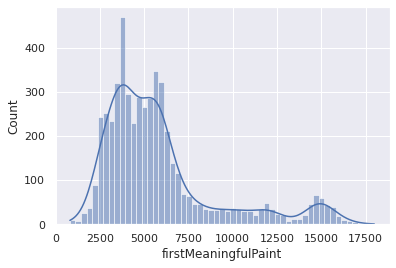

In [11]:
sns.histplot(data=d1[d1["firstMeaningfulPaint"]<18000],x="firstMeaningfulPaint",kde=True);

## Analisi del peso totale della pagina

In [12]:
d1["totalByteWeight"].describe()

count    5.299000e+03
mean     3.744231e+06
std      4.686862e+06
min      2.090000e+02
25%      1.395484e+06
50%      2.637909e+06
75%      4.435670e+06
max      7.494047e+07
Name: totalByteWeight, dtype: float64

In [13]:
d1["totalByteWeight"].mode()

0     456993.0
1     498503.0
2    1492837.0
dtype: float64

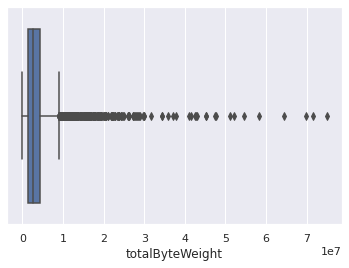

In [14]:
sns.boxplot(data=d1,x="totalByteWeight");

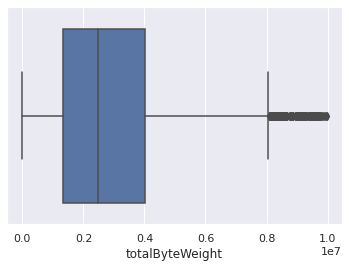

In [15]:
sns.boxplot(data=d1[d1["totalByteWeight"]<10e6],x="totalByteWeight");

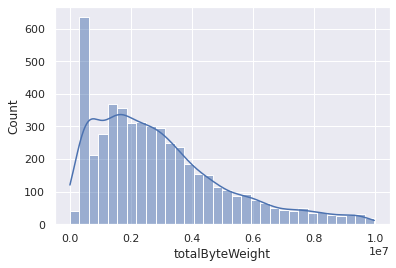

In [16]:
sns.histplot(data=d1[d1["totalByteWeight"]<10e6],x="totalByteWeight",kde=True);

## I 10 migliori punteggi

In [73]:
d1.sort_values("lighthouseScore",ascending=False)[["Codice_IPA","Denominazione_ente","url","lighthouseScore"]].head(10).style.format({
    "firstMeaningfulPaint": "{:,.2f}",
    "totalByteWeight": "{:,.2f}"
}).hide_index()

Codice_IPA,Denominazione_ente,url,lighthouseScore
c_a202,Comune di Alimena,https://www.comune.alimena.pa.it,100.000000
c_c778,Comune di Civitella Alfedena,https://www.comune.civitellaalfedena.aq.it,100.000000
c_h982,Comune di San Marco d'Alunzio,https://www.comune.sanmarcodalunzio.me.it,100.000000
c_l842,Comune di Vico del Gargano,https://www.comune.vicodelgargano.fg.it,100.000000
c_b603,Comune di Canicattini Bagni,https://www.comunedicanicattinibagni.it,100.000000
c_a811,Comune di Bertonico,https://www.comune.bertonico.lo.it,100.000000
c_i946,Comune di Stella,https://www.comune.stella.sv.it,100.000000
c_c946,Comune di Concerviano,https://www.comune.concerviano.ri.it,99.000000
c_b593,Comune di Canegrate,https://www.comunecanegrate.it/,99.000000
c_b760,Comune di Careggine,https://www.careggine.org,99.000000


## I 10 che hanno richiesto più tempo 

In [74]:
d1.sort_values("firstMeaningfulPaint",ascending=False)[["Codice_IPA","Denominazione_ente","url","firstMeaningfulPaint"]].head(10).style.format({
    "firstMeaningfulPaint": "{:,.2f}",
    "totalByteWeight": "{:,.2f}"
}).hide_index()

Codice_IPA,Denominazione_ente,url,firstMeaningfulPaint
c_e911,Comune di Marano di Valpolicella,https://www.comunemaranovalpolicella.vr.it,"38,165.87"
c_l002,Comune di Sulzano,https://www.comune.sulzano.bs.it,"35,239.44"
c_g247,Comune di Paisco Loveno,https://www.comune.paisco-loveno.bs.it,"32,530.61"
c_g932,Comune di Positano,https://www.comune.positano.sa.it,"31,430.18"
c_g074,Comune di Ono San Pietro,https://www.comune.ono-san-pietro.bs.it,"28,626.90"
c_f646,Comune di Montesilvano,https://www.comune.montesilvano.pe.it,"26,813.64"
c_h177,Comune di Ranzanico,https://www.comune.ranzanico.bg.it,"26,320.94"
c_b149,Comune di Breno,https://www.comune.breno.bs.it,"23,771.79"
c_h200,Comune di Raveo,https://www.comune.raveo.ud.it,"23,108.76"
c_c494,Comune di Cercivento,https://www.comune.cercivento.ud.it,"22,982.66"


## I 10 che pesano di piu in termini di dati trasferiti

In [71]:
d1.sort_values("totalByteWeight",ascending=False)[["Codice_IPA","Denominazione_ente","url","totalByteWeight"]].head(10).style.format({
    "firstMeaningfulPaint": "{:,.2f}",
    "totalByteWeight": "{:,.2f}"
}).hide_index()

Codice_IPA,Denominazione_ente,url,totalByteWeight
c_g403,Comune di Pedaso,https://www.comunedipedaso.it,"74,940,466.00"
c_g293,Comune di Palombara Sabina,https://www.comune.palombarasabina.rm.it,"71,651,578.00"
c_h525,Comune di Roncadelle,https://www.comune.roncadelle.bs.it,"69,873,782.00"
c_a542,Comune di Badolato,https://www.comune.badolato.cz.it,"64,417,226.00"
c_m214,Comune di Badesi,https://www.comunebadesi.ot.it,"58,201,562.00"
c_g653,Comune di Pieve Santo Stefano,https://www.pievesantostefano.net/,"54,463,277.00"
c_b839,Comune di Carrodano,https://www.comune.carrodano.sp.it,"52,044,743.00"
c_g054,Comune di Oltressenda Alta,https://www.comune.oltressendaalta.bg.it,"51,090,970.00"
c_g651,Comune di Pieve San Giacomo,https://www.comune.pievesangiacomo.cr.it,"47,642,963.00"
c_f489,Comune di Montedoro,https://www.comune.montedoro.cl.it,"47,503,005.00"


## Uso di Bootstrap (Italia)

Quanti Comuni usano Bootstrap?

In [20]:
d1.bootstrap.value_counts()

true     2972
false    1814
Error     513
Name: bootstrap, dtype: int64

Quanti Comuni che usano Bootstrap usano Bootstrap Italia?

In [21]:
d1[d1["bootstrap"]=='true'].bootstrapItalia.value_counts()

False    2556
True      416
Name: bootstrapItalia, dtype: int64

In [22]:
d1.pivot_table(index="bootstrapItalia",columns="bootstrap",values="Codice_IPA",aggfunc='count')

bootstrap,false,true
bootstrapItalia,,
False,1814.0,2556.0
True,NaN,416.0


Come si piazzano in media i siti che usano Bootstrap Italia nella classifica di Lighthouse?

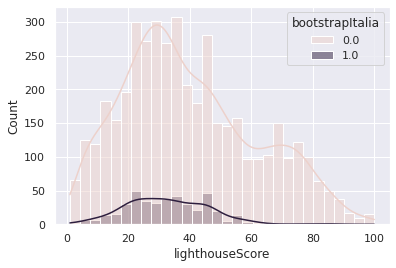

In [27]:
sns.histplot(data=d1,x="lighthouseScore",hue="bootstrapItalia",kde=True);

Come si piazzano in media i siti che usano Bootstrap Italia rispetto ai tempi di caricamento?

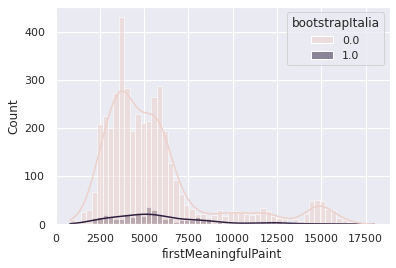

In [29]:
sns.histplot(data=d1[d1["firstMeaningfulPaint"]<18000],x="firstMeaningfulPaint",hue="bootstrapItalia",kde=True);

Come si piazzano in media i siti che usano Bootstrap Italia rispetto alle dimensioni di scaricamento?

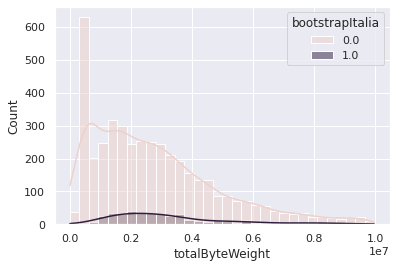

In [30]:
sns.histplot(data=d1[d1["totalByteWeight"]<10e6],x="totalByteWeight",hue="bootstrapItalia",kde=True);

## Mappe

In [51]:
italia=gpd.read_file("Limiti01012022_g/Com01012022_g/Com01012022_g_WGS84.shp")

italia["Codice_comune_ISTAT"]=list(map(int,italia["PRO_COM_T"]))

mapItalia=italia.merge(d,on="Codice_comune_ISTAT")

## Uso di Bootstrap (Italia)

Chi usa Bootstrap

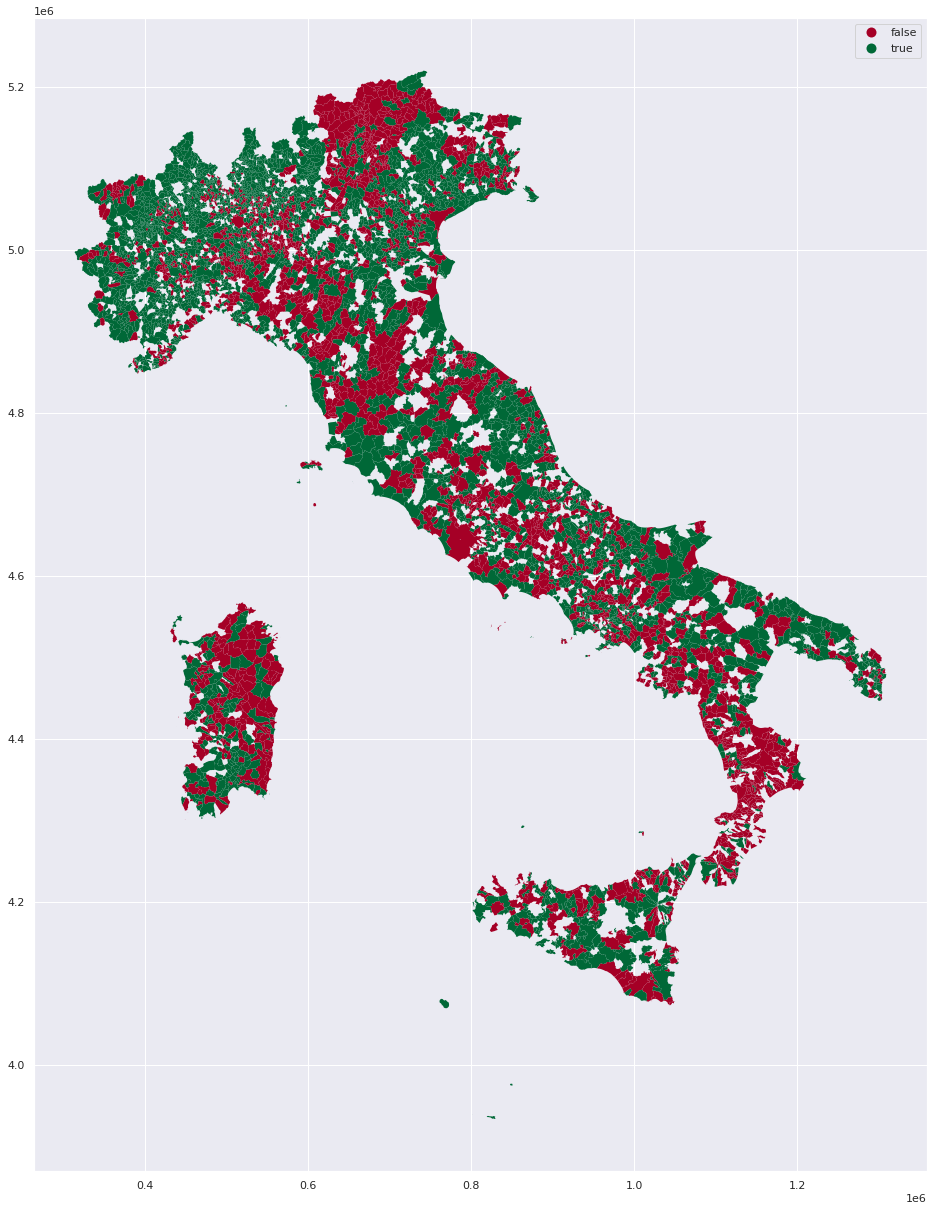

In [ ]:
mapItalia[mapItalia["bootstrap"]!="Error"].plot(column="bootstrap",figsize=(16,32),legend=True,cmap='RdYlGn',linewidth=0);

Chi usa Bootstrap Italia

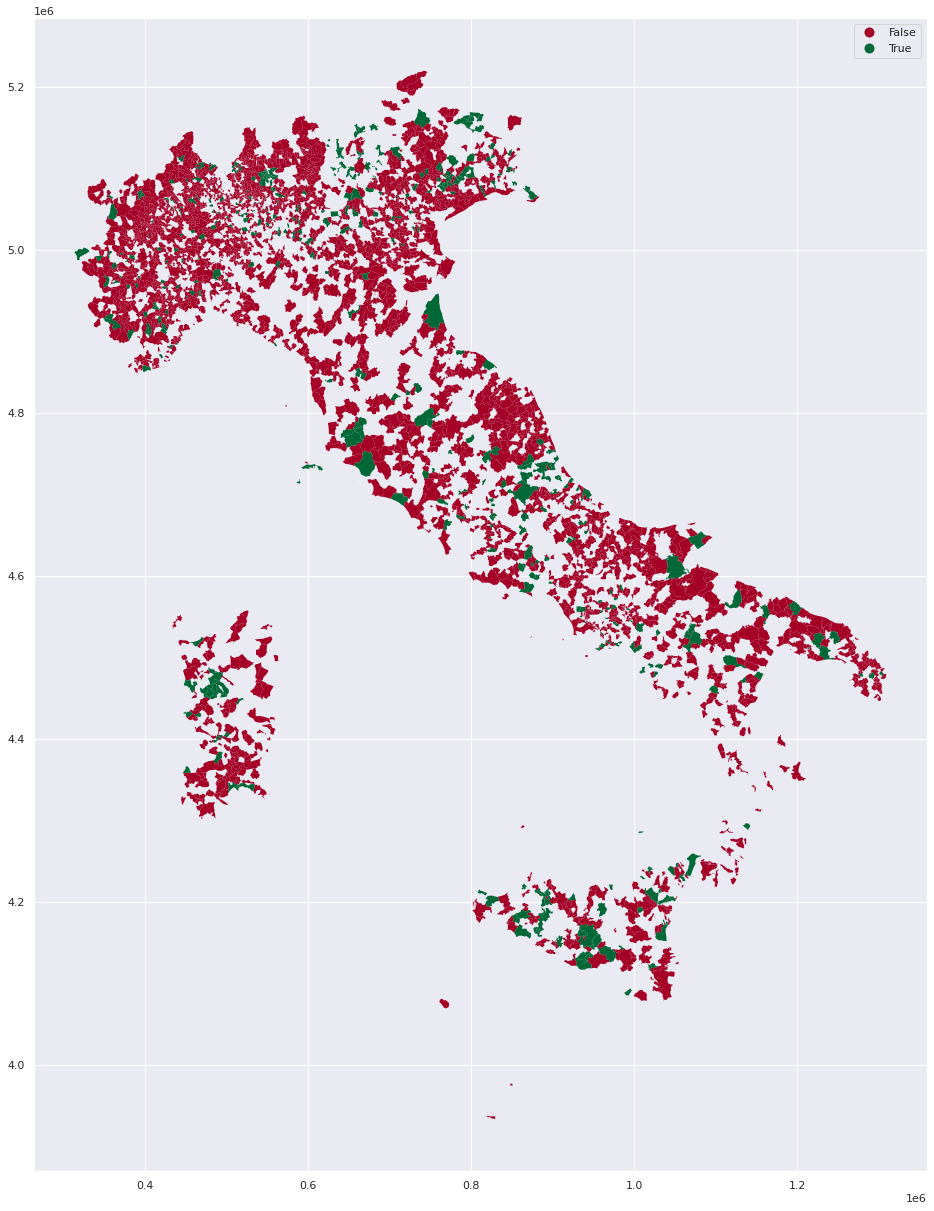

In [80]:
mapItalia[mapItalia["bootstrap"]=="true"].plot(column="bootstrapItalia",figsize=(16,32),legend=True,cmap='RdYlGn',linewidth=0);

## Punteggi Lighthouse

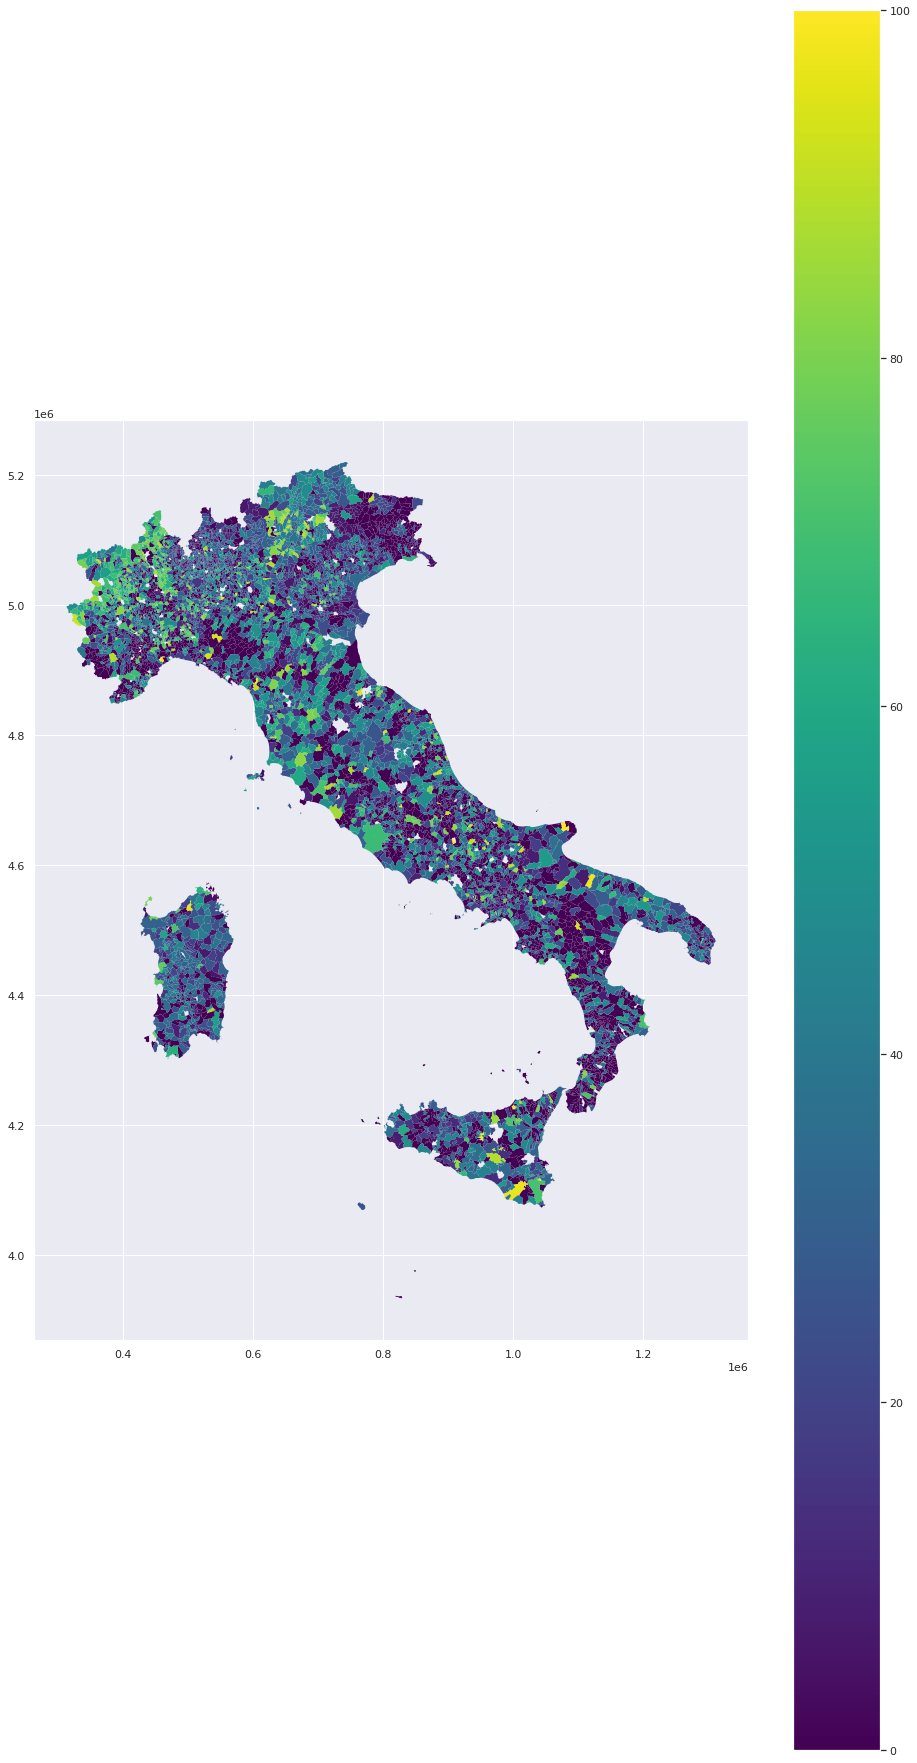

In [78]:
mapItalia.plot(column="lighthouseScore",figsize=(16,32),legend=True,cmap="viridis",linewidth=0);